https://drive.google.com/file/d/1xRJ2MiYVjbHFV0FpCZjphZ4BPID7U-mI/view?usp=sharing

https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes?select=bmw.csv

In [1]:
! gdown --id 1xRJ2MiYVjbHFV0FpCZjphZ4BPID7U-mI

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xRJ2MiYVjbHFV0FpCZjphZ4BPID7U-mI
To: /content/uk-used-cars.zip
100% 1.15M/1.15M [00:00<00:00, 84.5MB/s]


In [2]:
! unzip /content/uk-used-cars.zip -d /content/uk-used-cars

Archive:  /content/uk-used-cars.zip
  inflating: /content/uk-used-cars/audi.csv  
  inflating: /content/uk-used-cars/bmw.csv  
  inflating: /content/uk-used-cars/cclass.csv  
  inflating: /content/uk-used-cars/focus.csv  
  inflating: /content/uk-used-cars/ford.csv  
  inflating: /content/uk-used-cars/hyundi.csv  
  inflating: /content/uk-used-cars/merc.csv  
  inflating: /content/uk-used-cars/skoda.csv  
  inflating: /content/uk-used-cars/toyota.csv  
  inflating: /content/uk-used-cars/unclean cclass.csv  
  inflating: /content/uk-used-cars/unclean focus.csv  
  inflating: /content/uk-used-cars/vauxhall.csv  
  inflating: /content/uk-used-cars/vw.csv  


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/uk-used-cars/bmw.csv')

In [5]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


**Обучающая и тестовая выборка**

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train, test = train_test_split(df, train_size=0.6, random_state=42)

Валидационная выборка

In [8]:
val, test = train_test_split(test, train_size=0.5, random_state=42)

Список фичей

In [9]:
train.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [10]:
X = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize']

In [11]:
y = ['price']

In [12]:
cat_features = ['model', 'transmission', 'fuelType']

Принцип преобразования категориальных фичей (one hot encoding)

In [13]:
pd.get_dummies(train['transmission'])

,Automatic,Manual,Semi-Auto
5133,0,0,1
2121,1,0,0
6576,0,0,1
8330,0,1,0
3161,0,0,1
...,...,...,...
5734,0,0,1
5191,0,0,1
5390,0,0,1
860,0,0,1


Первый запуск кэтбуста (кстати, кэт - от слова категория)

In [14]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 6.4 MB/s eta 0:00:00


In [15]:
from catboost import CatBoostRegressor

Задача регрессии - определить непрерывную фичу (число)
Классификация - предсказание категориального признака

In [16]:
model = CatBoostRegressor(cat_features=cat_features, eval_metric='MAPE', verbose=100, random_seed=42)

In [17]:
model.fit(train[X], train[y], eval_set=(val[X], val[y]))

Learning rate set to 0.068263
0:	learn: 0.4607438	test: 0.4563750	best: 0.4563750 (0)	total: 55.3ms	remaining: 55.2s
100:	learn: 0.0904302	test: 0.0896388	best: 0.0896388 (100)	total: 925ms	remaining: 8.23s
200:	learn: 0.0781784	test: 0.0803125	best: 0.0803125 (200)	total: 1.48s	remaining: 5.9s
300:	learn: 0.0729925	test: 0.0764506	best: 0.0764506 (300)	total: 2.13s	remaining: 4.95s
400:	learn: 0.0695552	test: 0.0744676	best: 0.0744553 (399)	total: 2.93s	remaining: 4.38s
500:	learn: 0.0670683	test: 0.0732827	best: 0.0732827 (500)	total: 3.57s	remaining: 3.55s
600:	learn: 0.0652835	test: 0.0726170	best: 0.0726128 (597)	total: 4.22s	remaining: 2.8s
700:	learn: 0.0636320	test: 0.0720622	best: 0.0720500 (695)	total: 5.11s	remaining: 2.18s
800:	learn: 0.0623408	test: 0.0714586	best: 0.0714329 (794)	total: 5.7s	remaining: 1.42s
900:	learn: 0.0611487	test: 0.0711564	best: 0.0711321 (898)	total: 6.33s	remaining: 696ms
999:	learn: 0.0601407	test: 0.0708439	best: 0.0708403 (998)	total: 7.25s	rem

In [18]:
model.predict(test[X])

array([57417.53972205, 22003.56027391, 13461.40876567, ...,
       30553.87789981, 13818.32099473, 24849.36058457])

In [19]:
test['price_pred'] = model.predict(test[X])

In [20]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,57417.539722
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22003.560274
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13461.408766
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32149.002131
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35100.139852
...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14271.263108
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,31555.069740
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,30553.877900
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13818.320995


In [21]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [22]:
def error(y_true, y_pred):
  print(mean_absolute_error(y_true, y_pred))
  print(mean_absolute_percentage_error(y_true, y_pred))

In [23]:
error(test['price'], test['price_pred'])

1556.5378327680894
0.07367840910148211


Обучение на всех фичах

In [24]:
X = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize']

In [25]:
y = ['price']

In [26]:
cat_features = ['model', 'transmission', 'fuelType']

In [27]:
parameters = {'cat_features': cat_features,
              'eval_metric': "MAPE",
              'random_seed': 42,
              'verbose': 100}

In [28]:
model = CatBoostRegressor(**parameters)

In [29]:
model.fit(train[X], train[y], eval_set=(val[X], val[y]))

Learning rate set to 0.068263
0:	learn: 0.4607438	test: 0.4563750	best: 0.4563750 (0)	total: 20.6ms	remaining: 20.6s
100:	learn: 0.0904302	test: 0.0896388	best: 0.0896388 (100)	total: 2.1s	remaining: 18.7s
200:	learn: 0.0781784	test: 0.0803125	best: 0.0803125 (200)	total: 4.91s	remaining: 19.5s
300:	learn: 0.0729925	test: 0.0764506	best: 0.0764506 (300)	total: 5.6s	remaining: 13s
400:	learn: 0.0695552	test: 0.0744676	best: 0.0744553 (399)	total: 6.21s	remaining: 9.27s
500:	learn: 0.0670683	test: 0.0732827	best: 0.0732827 (500)	total: 6.83s	remaining: 6.8s
600:	learn: 0.0652835	test: 0.0726170	best: 0.0726128 (597)	total: 8.16s	remaining: 5.42s
700:	learn: 0.0636320	test: 0.0720622	best: 0.0720500 (695)	total: 9.43s	remaining: 4.02s
800:	learn: 0.0623408	test: 0.0714586	best: 0.0714329 (794)	total: 10.9s	remaining: 2.71s
900:	learn: 0.0611487	test: 0.0711564	best: 0.0711321 (898)	total: 12.3s	remaining: 1.36s
999:	learn: 0.0601407	test: 0.0708439	best: 0.0708403 (998)	total: 14s	remaini

In [30]:
test['price_pred_all'] = model.predict(test[X])

In [31]:
error(test['price'], test['price_pred_all'])

1556.5378327680894
0.07367840910148211


Learning rate

In [32]:
X = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize']

In [33]:
y = ['price']

In [34]:
cat_features = ['model', 'transmission', 'fuelType']

In [35]:
model = CatBoostRegressor(cat_features=cat_features, early_stopping_rounds=200, eval_metric='MAPE', learning_rate = 0.06, verbose=100, random_seed=42)

In [36]:
model.fit(train[X], train[y], eval_set=(val[X], val[y]))

0:	learn: 0.4637779	test: 0.4593664	best: 0.4593664 (0)	total: 22.5ms	remaining: 22.5s
100:	learn: 0.0950114	test: 0.0922221	best: 0.0922221 (100)	total: 2.11s	remaining: 18.7s
200:	learn: 0.0811834	test: 0.0808899	best: 0.0808899 (200)	total: 4.12s	remaining: 16.4s
300:	learn: 0.0751804	test: 0.0769117	best: 0.0769117 (300)	total: 5.25s	remaining: 12.2s
400:	learn: 0.0712262	test: 0.0741996	best: 0.0741826 (397)	total: 6.85s	remaining: 10.2s
500:	learn: 0.0685415	test: 0.0727351	best: 0.0727351 (500)	total: 7.64s	remaining: 7.61s
600:	learn: 0.0665271	test: 0.0715575	best: 0.0715575 (600)	total: 8.25s	remaining: 5.48s
700:	learn: 0.0650412	test: 0.0709556	best: 0.0709408 (698)	total: 8.88s	remaining: 3.79s
800:	learn: 0.0636484	test: 0.0706078	best: 0.0706070 (797)	total: 9.5s	remaining: 2.36s
900:	learn: 0.0623875	test: 0.0703234	best: 0.0702919 (867)	total: 10.1s	remaining: 1.11s
999:	learn: 0.0612221	test: 0.0698760	best: 0.0698740 (986)	total: 10.8s	remaining: 0us

bestTest = 0.06

Обучение на всех данных

In [37]:
train_full = pd.concat([train, val])

In [38]:
model.fit(train[X], train[y], eval_set=(val[X], val[y]))

0:	learn: 0.4637779	test: 0.4593664	best: 0.4593664 (0)	total: 7.77ms	remaining: 7.76s
100:	learn: 0.0950114	test: 0.0922221	best: 0.0922221 (100)	total: 610ms	remaining: 5.43s
200:	learn: 0.0811834	test: 0.0808899	best: 0.0808899 (200)	total: 1.2s	remaining: 4.75s
300:	learn: 0.0751804	test: 0.0769117	best: 0.0769117 (300)	total: 2.11s	remaining: 4.89s
400:	learn: 0.0712262	test: 0.0741996	best: 0.0741826 (397)	total: 2.71s	remaining: 4.05s
500:	learn: 0.0685415	test: 0.0727351	best: 0.0727351 (500)	total: 4.1s	remaining: 4.09s
600:	learn: 0.0665271	test: 0.0715575	best: 0.0715575 (600)	total: 5.35s	remaining: 3.55s
700:	learn: 0.0650412	test: 0.0709556	best: 0.0709408 (698)	total: 6.11s	remaining: 2.61s
800:	learn: 0.0636484	test: 0.0706078	best: 0.0706070 (797)	total: 6.73s	remaining: 1.67s
900:	learn: 0.0623875	test: 0.0703234	best: 0.0702919 (867)	total: 7.33s	remaining: 806ms
999:	learn: 0.0612221	test: 0.0698760	best: 0.0698740 (986)	total: 7.96s	remaining: 0us

bestTest = 0.069

In [39]:
parameters = {'iterations': model.best_iteration_ + 1, 
              'cat_features': cat_features,
              'eval_metric': "MAPE",
              'random_seed': 42,
              'verbose': 100}

In [40]:
model = CatBoostRegressor(**parameters)

In [41]:
model.fit(train_full[X], train_full[y])

Learning rate set to 0.058162
0:	learn: 0.4618926	total: 8.94ms	remaining: 8.81s
100:	learn: 0.0924350	total: 724ms	remaining: 6.35s
200:	learn: 0.0792879	total: 1.42s	remaining: 5.54s
300:	learn: 0.0736245	total: 2.15s	remaining: 4.89s
400:	learn: 0.0705348	total: 2.85s	remaining: 4.17s
500:	learn: 0.0686523	total: 3.53s	remaining: 3.42s
600:	learn: 0.0668130	total: 4.24s	remaining: 2.72s
700:	learn: 0.0654556	total: 4.93s	remaining: 2.01s
800:	learn: 0.0642802	total: 5.64s	remaining: 1.31s
900:	learn: 0.0630847	total: 6.39s	remaining: 610ms
986:	learn: 0.0622793	total: 7s	remaining: 0us


In [42]:
model.predict(test[X])

array([56286.50316503, 22750.99994478, 12941.93681434, ...,
       30788.60126514, 13254.93195878, 24685.09547085])

In [43]:
test['price_pred_all_data'] = model.predict(test[X])

In [44]:
error(test['price'], test['price_pred_all_data'])

1532.1999906529386
0.07311316368376607


Метрики регрессии

In [45]:
parameters = {'loss_function': "MAE",
              'cat_features': cat_features,
              'eval_metric': "MAPE",
              'random_seed': 42,
              'verbose': 100}

In [46]:
model = CatBoostRegressor(**parameters)

In [47]:
model.fit(train[X], train[y], eval_set=(val[X], val[y]))

0:	learn: 0.4071564	test: 0.4015652	best: 0.4015652 (0)	total: 8.78ms	remaining: 8.77s
100:	learn: 0.1136378	test: 0.1110478	best: 0.1110478 (100)	total: 1.49s	remaining: 13.2s
200:	learn: 0.0866586	test: 0.0861821	best: 0.0861821 (200)	total: 2.95s	remaining: 11.7s
300:	learn: 0.0782406	test: 0.0787555	best: 0.0787555 (300)	total: 3.65s	remaining: 8.47s
400:	learn: 0.0727190	test: 0.0743434	best: 0.0743434 (400)	total: 4.36s	remaining: 6.51s
500:	learn: 0.0695772	test: 0.0721972	best: 0.0721972 (500)	total: 5.08s	remaining: 5.05s
600:	learn: 0.0671061	test: 0.0707259	best: 0.0707259 (600)	total: 5.8s	remaining: 3.85s
700:	learn: 0.0654380	test: 0.0697441	best: 0.0697441 (700)	total: 6.49s	remaining: 2.77s
800:	learn: 0.0640010	test: 0.0691293	best: 0.0691034 (795)	total: 7.18s	remaining: 1.78s
900:	learn: 0.0627826	test: 0.0686525	best: 0.0686525 (900)	total: 7.88s	remaining: 866ms
999:	learn: 0.0617808	test: 0.0682226	best: 0.0682201 (998)	total: 8.55s	remaining: 0us

bestTest = 0.06

Анализ ошибок

In [48]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,price_pred_all,price_pred_all_data
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,57417.539722,57417.539722,56286.503165
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22003.560274,22003.560274,22750.999945
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13461.408766,13461.408766,12941.936814
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32149.002131,32149.002131,32846.897498
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35100.139852,35100.139852,35099.969654
...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14271.263108,14271.263108,14139.388699
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,31555.069740,31555.069740,30585.431363
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,30553.877900,30553.877900,30788.601265
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13818.320995,13818.320995,13254.931959


In [49]:
test['error'] = test['price_pred'] - test['price']

In [50]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,price_pred_all,price_pred_all_data,error
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,57417.539722,57417.539722,56286.503165,4427.539722
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22003.560274,22003.560274,22750.999945,-2077.439726
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13461.408766,13461.408766,12941.936814,462.408766
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32149.002131,32149.002131,32846.897498,20154.002131
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35100.139852,35100.139852,35099.969654,5225.139852
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14271.263108,14271.263108,14139.388699,-727.736892
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,31555.069740,31555.069740,30585.431363,1879.069740
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,30553.877900,30553.877900,30788.601265,-16.122100
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13818.320995,13818.320995,13254.931959,-1180.679005


In [51]:
import numpy as np
import matplotlib.pyplot as plt


plt.style.use('dark_background')


<Axes: >

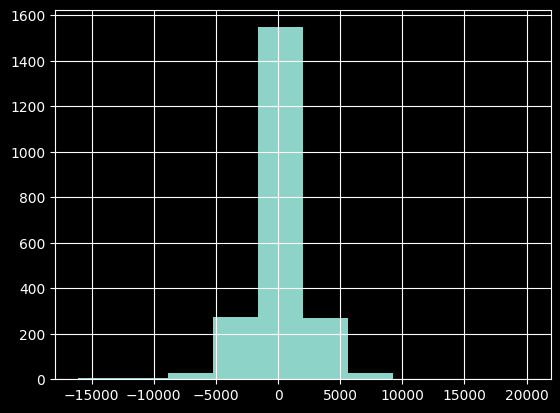

In [52]:
test['error'].hist()

In [55]:
test['error'].agg(['mean', 'median'])

mean      150.983044
median    193.378147
Name: error, dtype: float64

Абсолютная ошибка

In [56]:
test['abs_error'] = abs(test['error'])

In [57]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,price_pred_all,price_pred_all_data,error,abs_error
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,57417.539722,57417.539722,56286.503165,4427.539722,4427.539722
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22003.560274,22003.560274,22750.999945,-2077.439726,2077.439726
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13461.408766,13461.408766,12941.936814,462.408766,462.408766
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32149.002131,32149.002131,32846.897498,20154.002131,20154.002131
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35100.139852,35100.139852,35099.969654,5225.139852,5225.139852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14271.263108,14271.263108,14139.388699,-727.736892,727.736892
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,31555.069740,31555.069740,30585.431363,1879.069740,1879.069740
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,30553.877900,30553.877900,30788.601265,-16.122100,16.122100
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13818.320995,13818.320995,13254.931959,-1180.679005,1180.679005


<Axes: >

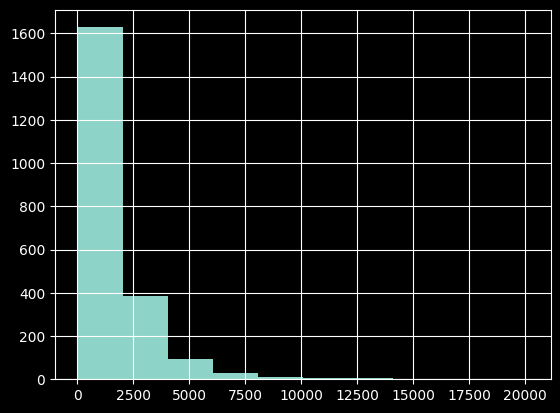

In [59]:
test['abs_error'].hist()

In [60]:
test['abs_error'].describe()

count     2157.000000
mean      1556.537833
std       1702.708957
min          1.441968
25%        502.584301
50%       1036.389615
75%       1976.352551
max      20154.002131
Name: abs_error, dtype: float64

In [63]:
test.sort_values('abs_error', ascending=False).head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,price_pred_all,price_pred_all_data,error,abs_error
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32149.002131,32149.002131,32846.897498,20154.002131,20154.002131
1244,4 Series,2020,47550,Semi-Auto,101,Diesel,145,60.1,2.0,31414.930791,31414.930791,30651.933697,-16135.069209,16135.069209
6592,M5,2019,70995,Semi-Auto,23,Petrol,145,24.1,4.4,85557.979289,85557.979289,83791.171986,14562.979289,14562.979289
6866,4 Series,2020,42520,Semi-Auto,102,Diesel,145,65.7,2.0,28415.436594,28415.436594,29017.339851,-14104.563406,14104.563406
2315,X2,2019,44980,Semi-Auto,500,Diesel,145,58.9,2.0,31724.541179,31724.541179,30825.840367,-13255.458821,13255.458821
6759,4 Series,2020,42495,Semi-Auto,18,Diesel,150,58.9,2.0,29660.941626,29660.941626,28587.714191,-12834.058374,12834.058374
6270,M4,2020,59999,Semi-Auto,3000,Petrol,150,28.5,3.0,47539.935472,47539.935472,51667.806012,-12459.064528,12459.064528
4833,M4,2019,58662,Automatic,3395,Petrol,145,34.0,3.0,46584.465196,46584.465196,46805.537847,-12077.534804,12077.534804
6215,M4,2018,53999,Semi-Auto,8725,Petrol,145,33.6,3.0,42415.516762,42415.516762,45303.514052,-11583.483238,11583.483238
5264,5 Series,2019,38450,Automatic,14522,Diesel,145,62.8,2.0,27479.001287,27479.001287,26852.923617,-10970.998713,10970.998713


In [65]:
test['price_group'] = pd.qcut(test['price'], 5)

In [70]:
t= test.groupby('price_group')['abs_error', 'error'].agg(['count', 'mean'])

<ipython-input-70-e4ee0fed2b0e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  t= test.groupby('price_group')['abs_error', 'error'].agg(['count', 'mean'])


In [73]:
t.columns = ['_'.join(col).strip() for col in t.columns.values]

In [74]:
t

,abs_error_count,abs_error_mean,error_count,error_mean
price_group,,,,
"(1199.999, 13995.0]",435,911.683821,435,472.967318
"(13995.0, 18500.0]",432,1193.118985,432,334.385576
"(18500.0, 23131.6]",427,1329.823427,427,234.437431
"(23131.6, 29990.0]",432,1754.321276,432,402.787968
"(29990.0, 74990.0]",431,2598.006606,431,-692.886570


In [77]:
t = t.drop('error_count', axis=1)

In [78]:
t

,abs_error_count,abs_error_mean,error_mean
price_group,,,
"(1199.999, 13995.0]",435,911.683821,472.967318
"(13995.0, 18500.0]",432,1193.118985,334.385576
"(18500.0, 23131.6]",427,1329.823427,234.437431
"(23131.6, 29990.0]",432,1754.321276,402.787968
"(29990.0, 74990.0]",431,2598.006606,-692.886570


In [79]:
t['mean_error_diff'] = t['abs_error_mean'] - test['abs_error'].mean()

In [80]:
t

,abs_error_count,abs_error_mean,error_mean,mean_error_diff
price_group,,,,
"(1199.999, 13995.0]",435,911.683821,472.967318,-644.854011
"(13995.0, 18500.0]",432,1193.118985,334.385576,-363.418848
"(18500.0, 23131.6]",427,1329.823427,234.437431,-226.714406
"(23131.6, 29990.0]",432,1754.321276,402.787968,197.783443
"(29990.0, 74990.0]",431,2598.006606,-692.886570,1041.468773


In [86]:
import seaborn as sns
cm = sns.dark_palette("red", as_cmap=True)

In [92]:
t['mean_error'] = test['abs_error'].mean()

In [93]:
t.style.background_gradient(cmap=cm, subset=['mean_error_diff'])

,abs_error_count,abs_error_mean,error_mean,mean_error_diff,mean_error
price_group,,,,,
"(1199.999, 13995.0]",435,911.683821,472.967318,-644.854011,1556.537833
"(13995.0, 18500.0]",432,1193.118985,334.385576,-363.418848,1556.537833
"(18500.0, 23131.6]",427,1329.823427,234.437431,-226.714406,1556.537833
"(23131.6, 29990.0]",432,1754.321276,402.787968,197.783443,1556.537833
"(29990.0, 74990.0]",431,2598.006606,-692.886570,1041.468773,1556.537833


In [94]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,price_pred_all,price_pred_all_data,error,abs_error,price_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,57417.539722,57417.539722,56286.503165,4427.539722,4427.539722,"(29990.0, 74990.0]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22003.560274,22003.560274,22750.999945,-2077.439726,2077.439726,"(23131.6, 29990.0]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13461.408766,13461.408766,12941.936814,462.408766,462.408766,"(1199.999, 13995.0]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32149.002131,32149.002131,32846.897498,20154.002131,20154.002131,"(1199.999, 13995.0]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35100.139852,35100.139852,35099.969654,5225.139852,5225.139852,"(23131.6, 29990.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14271.263108,14271.263108,14139.388699,-727.736892,727.736892,"(13995.0, 18500.0]"
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,31555.069740,31555.069740,30585.431363,1879.069740,1879.069740,"(23131.6, 29990.0]"
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,30553.877900,30553.877900,30788.601265,-16.122100,16.122100,"(29990.0, 74990.0]"
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13818.320995,13818.320995,13254.931959,-1180.679005,1180.679005,"(13995.0, 18500.0]"


In [109]:
def print_error(col):
  t = test.groupby(col)[['abs_error', 'error']].agg(['count', 'mean'])
  t.columns = ['_'.join(col).strip() for col in t.columns.values]
  t = t.drop('error_count', axis=1)
  t['mean_error_diff'] = t['abs_error_mean'] - test['abs_error'].mean()
  t['mean_error'] = test['abs_error'].mean()
  display(t.style.background_gradient(cmap=cm, subset=['mean_error_diff']))

In [110]:
print_error('year')

,abs_error_count,abs_error_mean,error_mean,mean_error_diff,mean_error
year,,,,,
1996,1,8840.398151,8840.398151,7283.860319,1556.537833
1999,1,1554.075997,1554.075997,-2.461836,1556.537833
2001,1,1351.556878,1351.556878,-204.980955,1556.537833
2002,2,2334.054474,-1479.726565,777.516641,1556.537833
2003,1,103.767636,103.767636,-1452.770197,1556.537833
2004,4,1499.943649,-2.735404,-56.594184,1556.537833
2006,3,1336.864412,368.389142,-219.673421,1556.537833
2007,2,1672.302867,1672.302867,115.765034,1556.537833
2008,4,2704.548581,2704.548581,1148.010748,1556.537833


In [111]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,price_pred_all,price_pred_all_data,error,abs_error,price_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,57417.539722,57417.539722,56286.503165,4427.539722,4427.539722,"(29990.0, 74990.0]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22003.560274,22003.560274,22750.999945,-2077.439726,2077.439726,"(23131.6, 29990.0]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13461.408766,13461.408766,12941.936814,462.408766,462.408766,"(1199.999, 13995.0]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32149.002131,32149.002131,32846.897498,20154.002131,20154.002131,"(1199.999, 13995.0]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35100.139852,35100.139852,35099.969654,5225.139852,5225.139852,"(23131.6, 29990.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14271.263108,14271.263108,14139.388699,-727.736892,727.736892,"(13995.0, 18500.0]"
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,31555.069740,31555.069740,30585.431363,1879.069740,1879.069740,"(23131.6, 29990.0]"
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,30553.877900,30553.877900,30788.601265,-16.122100,16.122100,"(29990.0, 74990.0]"
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13818.320995,13818.320995,13254.931959,-1180.679005,1180.679005,"(13995.0, 18500.0]"


In [112]:
print_error('transmission')

,abs_error_count,abs_error_mean,error_mean,mean_error_diff,mean_error
transmission,,,,,
Automatic,695,1497.009051,90.381775,-59.528782,1556.537833
Manual,504,1069.194158,139.438010,-487.343675,1556.537833
Semi-Auto,958,1856.113736,201.021226,299.575903,1556.537833


In [113]:
test['mileage_group'] = pd.qcut(test['mileage'], 5)

In [114]:
print_error('mileage_group')

,abs_error_count,abs_error_mean,error_mean,mean_error_diff,mean_error
mileage_group,,,,,
"(0.999, 4063.2]",432,2457.012446,345.607511,900.474613,1556.537833
"(4063.2, 9825.4]",431,1756.358333,116.461953,199.820500,1556.537833
"(9825.4, 24299.0]",432,1423.550351,75.269275,-132.987482,1556.537833
"(24299.0, 43519.8]",430,1151.867638,36.376659,-404.670194,1556.537833
"(43519.8, 190000.0]",432,992.489470,180.589327,-564.048363,1556.537833


In [115]:
print_error('fuelType')

,abs_error_count,abs_error_mean,error_mean,mean_error_diff,mean_error
fuelType,,,,,
Diesel,1394,1455.140068,110.189999,-101.397765,1556.537833
Hybrid,64,1562.771654,-174.973386,6.233822,1556.537833
Other,5,331.837203,-120.625928,-1224.700630,1556.537833
Petrol,694,1768.458615,264.938031,211.920782,1556.537833


In [117]:
test['tax_group'] = pd.qcut(test['tax'],5, duplicates='drop')

In [118]:
print_error('tax_group')

,abs_error_count,abs_error_mean,error_mean,mean_error_diff,mean_error
tax_group,,,,,
"(-0.001, 125.0]",512,845.991168,134.222686,-710.546665,1556.537833
"(125.0, 145.0]",1131,1822.024959,134.858449,265.487126,1556.537833
"(145.0, 150.0]",252,1801.288741,161.773665,244.750908,1556.537833
"(150.0, 580.0]",262,1563.624566,242.963896,7.086733,1556.537833


In [119]:
test.groupby('tax_group')[['price', 'year']].agg(['count', 'mean'])

price                year             
                count          mean count         mean
tax_group                                             
(-0.001, 125.0]   512  13264.859375   512  2015.365234
(125.0, 145.0]   1131  27536.747126  1131  2018.382847
(145.0, 150.0]    252  25288.376984   252  2018.166667
(150.0, 580.0]    262  18207.576336   262  2014.118321

In [120]:
test['mpg_group'] = pd.qcut(test['mpg'], 5)

In [121]:
print_error('mpg_group')

,abs_error_count,abs_error_mean,error_mean,mean_error_diff,mean_error
mpg_group,,,,,
"(5.499, 42.2]",444,2195.126104,333.313500,638.588271,1556.537833
"(42.2, 50.4]",487,1675.679577,377.739344,119.141745,1556.537833
"(50.4, 55.4]",380,1543.604490,17.084302,-12.933343,1556.537833
"(55.4, 64.2]",449,1248.927210,-97.628136,-307.610623,1556.537833
"(64.2, 470.8]",397,1056.478936,78.244759,-500.058896,1556.537833


In [122]:
test.groupby('mpg_group')[['price', 'year']].agg(['count', 'mean'])

price                year             
              count          mean count         mean
mpg_group                                           
(5.499, 42.2]   444  32876.211712   444  2017.743243
(42.2, 50.4]    487  23569.260780   487  2017.451745
(50.4, 55.4]    380  21489.018421   380  2017.194737
(55.4, 64.2]    449  18276.222717   449  2016.443207
(64.2, 470.8]   397  16704.297229   397  2016.727960

<Axes: xlabel='year'>

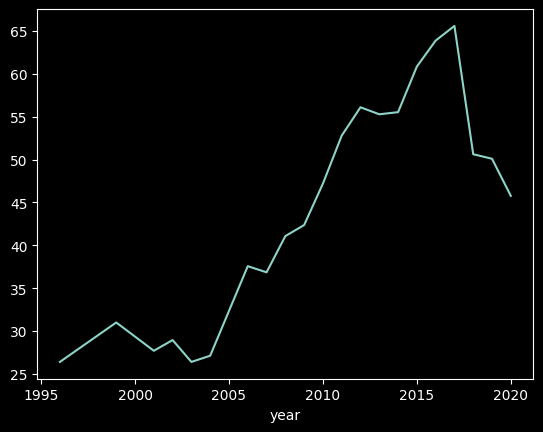

In [124]:
test.groupby('year')['mpg'].mean().plot()

In [125]:
test['engsize_group'] = pd.cut(test['engineSize'],[0, 1.5, 2, float('inf')])

In [126]:
print_error('engsize_group')

,abs_error_count,abs_error_mean,error_mean,mean_error_diff,mean_error
engsize_group,,,,,
"(0.0, 1.5]",279,1163.432715,154.246469,-393.105118,1556.537833
"(1.5, 2.0]",1347,1434.660917,79.657453,-121.876916,1556.537833
"(2.0, inf]",524,2086.338268,335.795951,529.800436,1556.537833


Встроенный анализ важности

In [127]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,engineSize,26.017253
1,model,22.229775
2,year,19.462471
3,mpg,12.405425
4,mileage,10.296494
5,fuelType,5.048990
6,transmission,2.951107
7,tax,1.588485


Shap

In [129]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 10.4 MB/s eta 0:00:00


In [130]:
import shap
shap.initjs()

In [131]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test[X])

Каждое число прибавляет(убавляет) цену

In [135]:
pd.DataFrame(shap_values,columns=X)

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,8680.740477,4158.605416,1348.350624,5071.023420,2705.415023,165.319025,7065.114076,6610.173232
1,-10.813965,52.696606,1023.184167,683.323102,48.309992,268.679018,-1018.259479,-1183.388863
2,-2433.544387,-1459.890937,35.862927,-4561.970864,-562.743719,141.723362,1228.395118,-849.496583
3,-2865.347514,4405.140977,962.207062,4344.058137,-1351.919357,211.093592,5990.207134,-1143.114558
4,-1105.866621,5303.848303,1093.349051,4995.982577,-1301.668836,311.957382,1841.500373,-1268.250686
...,...,...,...,...,...,...,...,...
2152,-1550.656722,-3576.809442,19.907819,-5660.852602,232.627610,146.413654,-386.778850,2267.377079
2153,-1266.236475,3816.688673,6.923292,2248.991049,-1039.597357,159.964653,918.357761,4544.754043
2154,645.052210,3250.355090,138.330046,3809.987150,2018.130693,349.211642,-636.731907,-1290.383148
2155,-2473.656426,-1655.314054,183.855239,-4535.798581,2156.649948,-954.701534,-864.017354,-619.835042


In [138]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], test[X].iloc[0,:])

Топ 10 ошибок

In [140]:
shap_cols = [x + '_shap' for x in X]

In [142]:
shap_values_df = pd.DataFrame(shap_values,columns=shap_cols)

In [143]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,price_pred_all,price_pred_all_data,error,abs_error,price_group,mileage_group,tax_group,mpg_group,engsize_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,57417.539722,57417.539722,56286.503165,4427.539722,4427.539722,"(29990.0, 74990.0]","(0.999, 4063.2]","(125.0, 145.0]","(5.499, 42.2]","(2.0, inf]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22003.560274,22003.560274,22750.999945,-2077.439726,2077.439726,"(23131.6, 29990.0]","(9825.4, 24299.0]","(145.0, 150.0]","(55.4, 64.2]","(1.5, 2.0]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13461.408766,13461.408766,12941.936814,462.408766,462.408766,"(1199.999, 13995.0]","(43519.8, 190000.0]","(150.0, 580.0]","(42.2, 50.4]","(1.5, 2.0]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32149.002131,32149.002131,32846.897498,20154.002131,20154.002131,"(1199.999, 13995.0]","(0.999, 4063.2]","(145.0, 150.0]","(5.499, 42.2]","(1.5, 2.0]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35100.139852,35100.139852,35099.969654,5225.139852,5225.139852,"(23131.6, 29990.0]","(0.999, 4063.2]","(125.0, 145.0]","(5.499, 42.2]","(1.5, 2.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14271.263108,14271.263108,14139.388699,-727.736892,727.736892,"(13995.0, 18500.0]","(43519.8, 190000.0]","(150.0, 580.0]","(50.4, 55.4]","(2.0, inf]"
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,31555.069740,31555.069740,30585.431363,1879.069740,1879.069740,"(23131.6, 29990.0]","(4063.2, 9825.4]","(125.0, 145.0]","(5.499, 42.2]","(2.0, inf]"
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,30553.877900,30553.877900,30788.601265,-16.122100,16.122100,"(29990.0, 74990.0]","(0.999, 4063.2]","(125.0, 145.0]","(42.2, 50.4]","(1.5, 2.0]"
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13818.320995,13818.320995,13254.931959,-1180.679005,1180.679005,"(13995.0, 18500.0]","(43519.8, 190000.0]","(-0.001, 125.0]","(64.2, 470.8]","(1.5, 2.0]"


In [146]:
test_shap = pd.concat([test.reset_index(), shap_values_df], axis=1)

In [147]:
test_shap.sort_values('abs_error', ascending=False)

,index,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,...,mpg_group,engsize_group,model_shap,year_shap,transmission_shap,mileage_shap,fuelType_shap,tax_shap,mpg_shap,engineSize_shap
3,6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,...,"(5.499, 42.2]","(1.5, 2.0]",-2865.347514,4405.140977,962.207062,4344.058137,-1351.919357,211.093592,5990.207134,-1143.114558
144,1244,4 Series,2020,47550,Semi-Auto,101,Diesel,145,60.1,2.0,...,"(55.4, 64.2]","(1.5, 2.0]",-347.633782,4116.535205,903.223344,4648.924950,189.910064,282.287679,-1153.967118,-1306.666210
1349,6592,M5,2019,70995,Semi-Auto,23,Petrol,145,24.1,4.4,...,"(5.499, 42.2]","(2.0, inf]",15204.685752,4611.312308,1848.489052,7542.085892,592.488667,387.613957,15005.079035,10196.080020
1914,6866,4 Series,2020,42520,Semi-Auto,102,Diesel,145,65.7,2.0,...,"(64.2, 470.8]","(1.5, 2.0]",-359.524211,3909.798018,829.798416,4519.633039,-308.216748,251.293703,-1927.876938,-1381.012312
706,2315,X2,2019,44980,Semi-Auto,500,Diesel,145,58.9,2.0,...,"(55.4, 64.2]","(1.5, 2.0]",3610.954032,2675.768280,1011.113598,4837.666972,-6.395193,254.483704,-1770.303348,-2860.367465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,180,X1,2016,14498,Manual,57717,Diesel,125,58.9,2.0,...,"(55.4, 64.2]","(1.5, 2.0]",192.041141,-1194.056593,-2155.275842,-3883.767887,172.976685,-130.935291,-451.040039,-619.496725
1566,487,1 Series,2017,21514,Semi-Auto,15907,Petrol,150,39.8,3.0,...,"(5.499, 42.2]","(2.0, inf]",-4114.795757,-2189.517472,1006.387271,-71.368584,-622.032484,232.293169,1626.937201,2924.679745
183,1160,3 Series,2015,13795,Semi-Auto,92308,Diesel,150,54.3,3.0,...,"(50.4, 55.4]","(2.0, inf]",-1786.195137,-3550.827035,1132.589812,-6390.881541,182.480844,314.492353,-667.541187,2130.793991
1472,1034,X1,2018,23295,Semi-Auto,11570,Petrol,150,44.8,2.0,...,"(42.2, 50.4]","(1.5, 2.0]",463.478792,-68.735179,1059.425389,731.324540,-493.842647,210.731096,944.584878,-1544.200488


In [153]:
shap.initjs()
shap.force_plot(explainer.expected_value, test_shap[shap_cols].values[1,:], test_shap[X].iloc[1,:])

In [150]:
pd.options.display.max_columns = 100

In [151]:
test_shap

,index,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,price_pred_all,price_pred_all_data,error,abs_error,price_group,mileage_group,tax_group,mpg_group,engsize_group,model_shap,year_shap,transmission_shap,mileage_shap,fuelType_shap,tax_shap,mpg_shap,engineSize_shap
0,4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,57417.539722,57417.539722,56286.503165,4427.539722,4427.539722,"(29990.0, 74990.0]","(0.999, 4063.2]","(125.0, 145.0]","(5.499, 42.2]","(2.0, inf]",8680.740477,4158.605416,1348.350624,5071.023420,2705.415023,165.319025,7065.114076,6610.173232
1,4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22003.560274,22003.560274,22750.999945,-2077.439726,2077.439726,"(23131.6, 29990.0]","(9825.4, 24299.0]","(145.0, 150.0]","(55.4, 64.2]","(1.5, 2.0]",-10.813965,52.696606,1023.184167,683.323102,48.309992,268.679018,-1018.259479,-1183.388863
2,9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13461.408766,13461.408766,12941.936814,462.408766,462.408766,"(1199.999, 13995.0]","(43519.8, 190000.0]","(150.0, 580.0]","(42.2, 50.4]","(1.5, 2.0]",-2433.544387,-1459.890937,35.862927,-4561.970864,-562.743719,141.723362,1228.395118,-849.496583
3,6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32149.002131,32149.002131,32846.897498,20154.002131,20154.002131,"(1199.999, 13995.0]","(0.999, 4063.2]","(145.0, 150.0]","(5.499, 42.2]","(1.5, 2.0]",-2865.347514,4405.140977,962.207062,4344.058137,-1351.919357,211.093592,5990.207134,-1143.114558
4,7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35100.139852,35100.139852,35099.969654,5225.139852,5225.139852,"(23131.6, 29990.0]","(0.999, 4063.2]","(125.0, 145.0]","(5.499, 42.2]","(1.5, 2.0]",-1105.866621,5303.848303,1093.349051,4995.982577,-1301.668836,311.957382,1841.500373,-1268.250686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2152,9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14271.263108,14271.263108,14139.388699,-727.736892,727.736892,"(13995.0, 18500.0]","(43519.8, 190000.0]","(150.0, 580.0]","(50.4, 55.4]","(2.0, inf]",-1550.656722,-3576.809442,19.907819,-5660.852602,232.627610,146.413654,-386.778850,2267.377079
2153,6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,31555.069740,31555.069740,30585.431363,1879.069740,1879.069740,"(23131.6, 29990.0]","(4063.2, 9825.4]","(125.0, 145.0]","(5.499, 42.2]","(2.0, inf]",-1266.236475,3816.688673,6.923292,2248.991049,-1039.597357,159.964653,918.357761,4544.754043
2154,1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,30553.877900,30553.877900,30788.601265,-16.122100,16.122100,"(29990.0, 74990.0]","(0.999, 4063.2]","(125.0, 145.0]","(42.2, 50.4]","(1.5, 2.0]",645.052210,3250.355090,138.330046,3809.987150,2018.130693,349.211642,-636.731907,-1290.383148
2155,4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13818.320995,13818.320995,13254.931959,-1180.679005,1180.679005,"(13995.0, 18500.0]","(43519.8, 190000.0]","(-0.001, 125.0]","(64.2, 470.8]","(1.5, 2.0]",-2473.656426,-1655.314054,183.855239,-4535.798581,2156.649948,-954.701534,-864.017354,-619.835042


In [154]:
print_error('model')

,abs_error_count,abs_error_mean,error_mean,mean_error_diff,mean_error
model,,,,,
1 Series,381,1207.539584,41.019650,-348.998249,1556.537833
2 Series,237,1440.770286,232.689263,-115.767547,1556.537833
3 Series,499,1351.426090,81.433696,-205.111743,1556.537833
4 Series,203,1715.114274,-13.612993,158.576442,1556.537833
5 Series,216,1552.160919,227.298368,-4.376914,1556.537833
6 Series,17,1910.040085,786.379547,353.502252,1556.537833
7 Series,19,3267.148053,-1903.523295,1710.610220,1556.537833
8 Series,4,2929.288687,-2019.214700,1372.750854,1556.537833
M2,10,3461.083709,3258.239859,1904.545876,1556.537833


<Axes: >

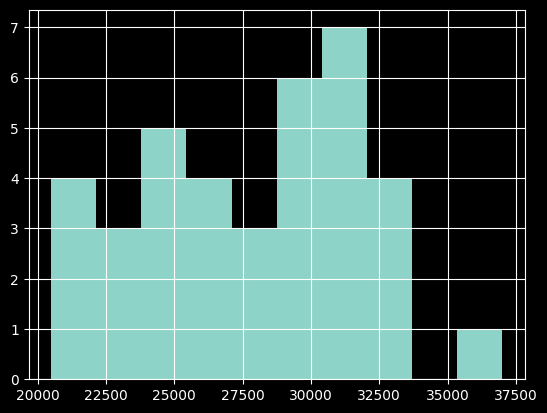

In [160]:
train[(train['model'] == ' 1 Series')&(train['year'] == 2020)]['price'].hist()

In [161]:
shap.initjs()
shap.force_plot(explainer.expected_value, test_shap[shap_cols].head(10).values, 
                                          test_shap[X].head(10))

In [162]:
X

['model',
 'year',
 'transmission',
 'mileage',
 'fuelType',
 'tax',
 'mpg',
 'engineSize']

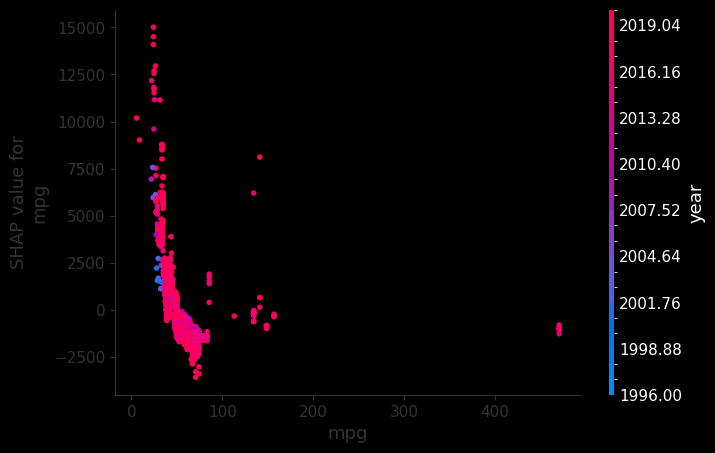

In [167]:
shap.dependence_plot("mpg", shap_values, test[X])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


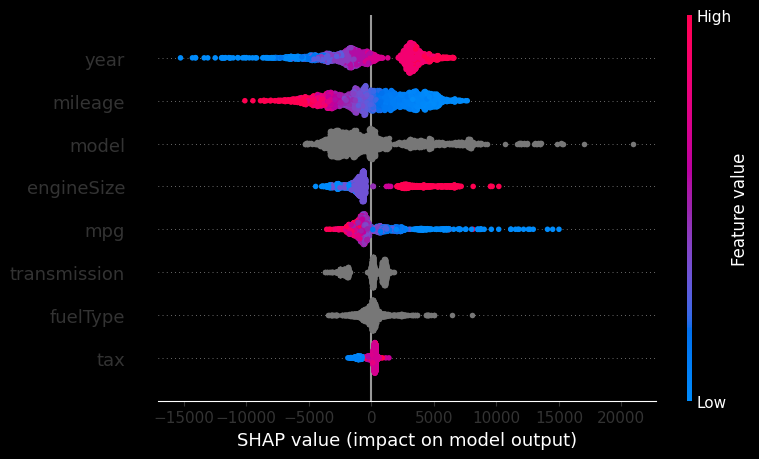

In [168]:
shap.summary_plot(shap_values, test[X])